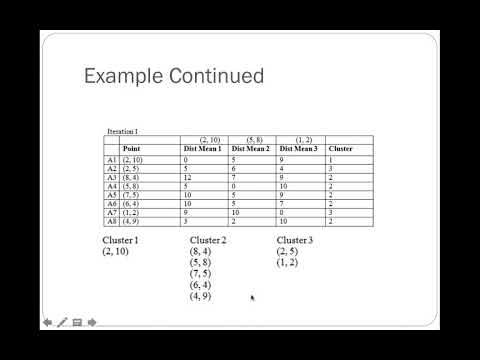

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('_S5tvagaQRU')


In an unsupervised machine learning process, there is not a "correct" result we feed to the machine. Rather, we let the machine learn to discern a pattern. One important such procedure is clustering. Say there is a scatter chart of the following points:

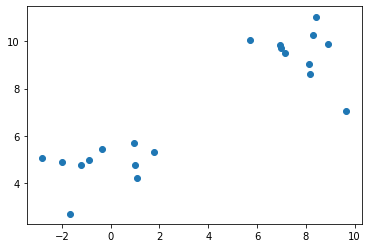

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, centers=2, n_features=2)
plt.scatter(X.T[0],X.T[1])

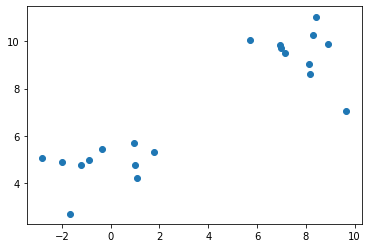

In [8]:
plt.scatter(X.T[0],X.T[1])

In [9]:
np.around(X.T,decimals=1)

array([[-2. ,  8.2, -0.4,  1. ,  5.7,  1. ,  9.7,  8.3, -2.8,  8.9, -1.7,
         8.1,  1.1,  1.8,  6.9, -1.2,  7. ,  8.4,  7.1, -0.9],
       [ 4.9,  8.6,  5.5,  5.7, 10.1,  4.8,  7.1, 10.2,  5.1,  9.9,  2.7,
         9.1,  4.2,  5.3,  9.8,  4.8,  9.7, 11. ,  9.5,  5. ]])

In [14]:
"[ 4.9,  8.6,  5.5,  5.7, 10.1,  4.8,  7.1, 10.2,  5.1,  9.9,  2.7,9.1,  4.2,  5.3,  9.8,  4.8,  9.7, 11. ,  9.5,  5. ]".replace(". ","").replace(" ","")

'[4.9,8.6,5.5,5.7,10.1,4.8,7.1,10.2,5.1,9.9,2.7,9.1,4.2,5.3,9.8,4.8,9.7,11,9.5,5]'

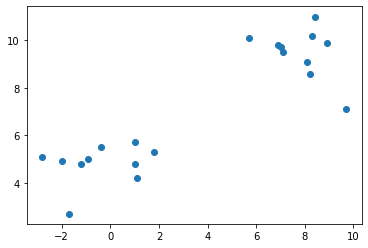

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = [-2,8.2,-0.4,1,5.7,1,9.7,8.3,-2.8,8.9,-1.7,8.1,1.1,1.8,6.9,-1.2,7,8.4,7.1,-0.9]
y = [4.9,8.6,5.5,5.7,10.1,4.8,7.1,10.2,5.1,9.9,2.7,9.1,4.2,5.3,9.8,4.8,9.7,11,9.5,5]
plt.scatter(x,y)

It is obvious that the ten points in the lower left corner belong in a group, while the other ten constitute another group. A clustering problem is then to come up with some algorithm that can make such groupings. Additionally, if a new point comes up, the algorithm is also capable of assigning this new point into one of these groups, or clusters, according to the same criteria. One such algorithm is called K-means. Note the syntax below:

In [16]:
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=2).fit(np.array([x,y]).T)
clus.labels_

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1],
      dtype=int32)

<p> The T in np.array([x,y]).T means the transpose of the array. The scikit-learn function requires that the training data be in the form of an array of all points [[-2,4.9],[8.2,8.6],[-0.4,5.5],...], so we have to transpose the array [x,y]. </p>
<p> The 20 points are given the labels 0 or 1. The label names are arbitrary, and could change if you run the clustering again, but the relative clustering of the points would not change. And you can see here in using K-means, you must supply the number of clusters, or k, you wish the points are grouped into. Some other algorithms may not require that. </p>
<p> As mentioned above, K-means clustering can also put a new point in one of the clusters according to the same criteria. The function is called predict. Say we want to predict which cluster (5,4) belongs to: </p>

In [17]:
clus.predict([[5,4]])

array([1], dtype=int32)

<p> The algorithm says 1, that is (5,4) belongs to the same cluster as the points labeled 1 in the training data. </p>
<p> Another important clustering algorithm is called agglomerative clustering. As seen below, the syntax is very similar: </p>

In [14]:
from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters=2).fit(np.array([x,y]).T)
clus.labels_

array([0, 0, 0, 0, 1, 1, 1], dtype=int64)

Now we can try this on a bigger dataset. Using the Iris:

In [8]:
df = pd.read_csv("iris-mv.csv")
df = df.fillna(method='ffill')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.0,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
130,6.8,3.2,5.9,2.3,Iris-virginica
131,6.7,3.3,5.7,2.5,Iris-virginica
132,6.3,2.5,5.0,1.9,Iris-virginica
133,6.5,3.0,5.2,2.0,Iris-virginica


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df.drop(['Species'],axis=1))
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 1])

We can try to see how the clustering does by doing an example plot of SepalWidth versus SepalLength:

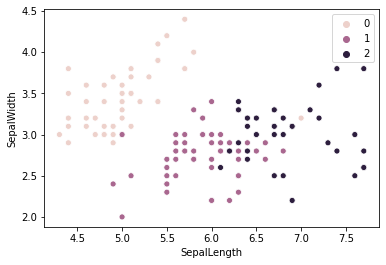

In [12]:
sns.scatterplot(x="SepalLength",y="SepalWidth",data=df,hue=kmeans.labels_)

We can compare it to the actual scattering graph:

In [ ]:
sns.scatterplot(x="SepalLength",y="SepalWidth",data=df,hue="Species")

Exercise: <br>
Use k-means clustering on the wine dataset, k=3. Check the accuracy. Plot the scattering graph of any two attributes of the wine according to the type of wine. Plot the scattering graph of the actual wine classes. Is it possible to tell what type of wine it is by tasting?